In [9]:
"""
An implementation for HW2.
This is source code for logistic regression for optimal performance.
This uses Logistic regression method with cross entrophy with GD for optimization.
By 32190984 Isu Kim  @ github.com/gooday2die
"""

'\nAn implementation for HW2.\nThis is source code for logistic regression for optimal performance.\nThis uses Logistic regression method with cross entrophy with GD for optimization.\nBy 32190984 Isu Kim  @ github.com/gooday2die\n'

In [10]:
import pandas as pd
import numpy as np

In [11]:
def sigmoid(x):
    """
    A function that implements sigmoid function.
    This will calculate sigmoid function with value of x.
    
    @param x: The x value to calculate sigmoid function.
    @return: The calculated value in float.
    """
    return 1 / (1 + np.exp(-x))

In [12]:
def equation(x, theta):
    return theta[0] * x[0] + theta[1] * (x[1] ** 7) + theta[2] * ((x[1] ** 6) * x[2]) + theta[3] * ((x[1] ** 5) * (x[2] ** 2)) + theta[4] * ((x[1] ** 4) * (x[2] ** 3)) + theta[5] * ((x[1] ** 3) * (x[2] ** 4)) + theta[6] * (x[1] ** 2) * (x[2] ** 5) + theta[7] * x[1] * (x[2] ** 6) + theta[8] * (x[2] ** 7)

In [13]:
def hypothesis(x, theta):
    """
    A function that is for hypothesis which is our model h_\theta(x)
    This will calculate sigmoid function with linear function as exponent.
    
    Both parameters must be in 1D flattened list object.
    @param x: The list object containing pair of [x_1 and x_2]
    @param theta: The list object containing tuple of [\theta_0, \theta_1, \theta_2]
    @return: The calculated value.    
    """
    return sigmoid(equation(x, theta))

In [14]:
def get_gradient(x, y, theta, j):
    """
    A function that is for calculating gradient of specific j.

    @param x: All data containing x values. 
              This shall be in N * 3 dimension.
    @param y: All data containing y values.
              This shall be in N * 1 dimension.
    @param theta: All theta values.
              This shall be in N * 1 dimension.
    @param j: The specific j to get gradient from.
              For example, if we are about to update \theta_1, use j as 1.
              This function will calculate gradient of the cost graph with j = 1.
    @return: The calculate gradient value for specific j.
    """
    tmp = 0
    for i in range(len(x)):
        predict = hypothesis(x[i], theta)
        mul = 0
        if (j == 0):
            mul = 1
        elif (j == 1):
            mul = x[i][1] ** 7
        elif (j == 2):
            mul = (x[i][1] ** 6) * (x[i][2] ** 1)
        elif (j == 3):
            mul = (x[i][1] ** 5) * (x[i][2] ** 2)
        elif (j == 4):
            mul = (x[i][1] ** 4) * (x[i][2] ** 3)
        elif (j == 5):
            mul = (x[i][1] ** 3) * (x[i][2] ** 4)
        elif (j == 6):
            mul = (x[i][1] ** 2) * (x[i][2] ** 5)
        elif (j == 7):
            mul = (x[i][1] ** 1) * (x[i][2] ** 6)
        elif (j == 8):
            x[i][2] ** 7
        tmp = tmp + (predict - y[i]) * mul
    return tmp / len(x)

In [15]:
def do_gradient_descent(max_iter, learning_rate, data_x, data_y, round_point):
    """
    A function that does gradient descent.
    This will use logistic regression with cost using cross entropy.
    
    Please refer to documentation for more information about implementation.
    
    @param max_iter: The maximum iteration count for training. Use iterations like 1000000.
    @param learning_rate: The learning rate for gradient descent.
                          Use learning rate which is not too small, don't use values like 0.01.
                          That will take so much time.
    @param data_x: The x data.
    @param data_y: The y data.
    @param round_point: The point that the weights are rounded.
                        If not rounded, this might go up to lots of iterations.
    @return list object that contains (a, b)
    """
    theta = [0] * 9  # Intial value for \thetas.
    x = [(1, data_x["x1"][i], data_x["x2"][i]) for i in range(len(data_x))]  # Store 1, x_1, x_2)
    y = list(data_y)
    
    before_theta = list()
    
    for i in range(max_iter):  # Iterate for max_iter count
        if i % 100 == 0:  # In every 1000 iterations, print \theta. just for outputs.
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))

        before_theta = theta
        tmp_theta = [0] * 9  # Store tmp \theta values.
    
        for j in range(9):  # Update \theta_0 to \theta_3
            gradient = get_gradient(x, y, theta, j)  # Calculate gradient
            tmp_theta[j] = theta[j] - learning_rate * gradient  # Apply GD.

        theta = tmp_theta  # Update \thetas simultaneously.        

        # Check if convergence happened. If so, stop training.
        if ([round(x, round_point) for x in before_theta] == [round(x, round_point) for x in theta]):
        #if before_theta == theta:
            print("Convergence!!! Stop training.")
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))
            break
        
    return theta

In [16]:
def predict(x, theta):
    """
    A function that predicts data using theta value
    @param x: The x value in [X_0, X_1, X_2] format.
    @param theta: The theta values to use.
    @return: Predicted label
    """
    if equation(x, theta) >= 0:
        return 1
    else:
        return 0

In [17]:
def calculate_accr(x_in, y_in, theta):
    """
    A function that calculates accuracy with \theta
    The accuracy is calculated by
    (total correct predictions) / (data count)
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Accuracy.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.

    correct = 0
    for i in range(len(x)):  # Iterate and check if predict matches real data.
        predicted = predict(x[i], theta)
        if predicted == y[i]:
            correct += 1  # If so, add one to correct.
    print("[+] " + str(correct) + "/" + str(len(x)))
    return correct / len(x)  # Divide all corrects by all data.

In [18]:
def calculate_cost(x_in, y_in, theta):
    """
    A function that calculates cost of with \theta.
    The cost is calculated by
    
    -1/m sum i from 1 to m (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i)))
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Cost.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.
    
    total = 0
    for i in range(len(y)):
        # Iterate and calculate (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i))
        total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
    
    return -1 * total / len(y)

In [19]:
df_train = pd.read_csv("../hw2_train.csv")  # Read csv file.
data_x = df_train[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_train["y"]  # Select y col from data

In [20]:
# This is for Task 1. from homework 2.
# This will train data using hw2_train.csv and store theta values into result.
# Please be aware that this will take lots of time to converge and exit.
# If you cannot wait this convergence, there are two options
#
# 1. Use low rounding points: 
#    This will make our model if some digits match for some digits, it will consider it convergence.
result = do_gradient_descent(10000, 0.1, data_x, data_y, 5) 

[+] Iter : 0 / Theta : [0, 0, 0, 0, 0, 0, 0, 0, 0]


/tmp/ipykernel_219248/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[+] Iter : 100 / Theta : [6.300592436946802e-01, -35.18623630145917, -11.051776010100403, -5.864238484371761, -3.8337404981502843, -2.371629180461107, -2.3487377977086523, -0.5694684385135054, 0.0]
[+] Iter : 200 / Theta : [1.077388242251664e+00, -34.56913524356953, -11.21806710825609, -5.535884586674014, -3.94462694457057, -2.246812948331952, -1.8615210929713193, -0.4204266114306275, 0.0]
[+] Iter : 300 / Theta : [1.399436294703741e+00, -33.947946477678435, -11.393420780691157, -5.1890592694909685, -4.091850086886441, -2.0589346960680244, -1.4599819581796596, -0.32088055553028, 0.0]
[+] Iter : 400 / Theta : [1.6374352361794717e+00, -33.325340508894364, -11.572466089977205, -4.834510075505726, -4.2553049608672175, -1.8416133989427215, -1.105488199483386, -0.2433538404594591, 0.0]
[+] Iter : 500 / Theta : [1.8171204747201393e+00, -32.70338346896309, -11.750912759741325, -4.4810163427797916, -4.418179762419037, -1.624126182882612, -0.762081441569528, -0.1700085903395229, 0.0]
[+] Iter : 

[+] Iter : 4200 / Theta : [2.421919826187603e+00, -14.288392224381207, -12.382434323000712, 0.6640949174758883, -1.5869941888645573, -2.472631797819211, -0.22849393874154245, 0.04394294156675159, 0.0]
[+] Iter : 4300 / Theta : [2.4047135709626364e+00, -13.948317492829624, -12.238653079357134, 0.6571425332378193, -1.4206691244395264, -2.4347626670428135, -0.25806960162084913, 0.04064169191010759, 0.0]
[+] Iter : 4400 / Theta : [2.387814875323217e+00, -13.611181256332173, -12.093007187696276, 0.649607886918723, -1.2559686551063138, -2.392697955955141, -0.2864150111642775, 0.036542856064865306, 0.0]
[+] Iter : 4500 / Theta : [2.3711946722817077e+00, -13.277622034660428, -11.94500892286765, 0.6412881435056981, -1.0932248841853769, -2.3453601889026836, -0.31354648265662255, 0.03143160582427497, 0.0]
[+] Iter : 4600 / Theta : [2.3548303852106605e+00, -12.948253252427685, -11.79414902169114, 0.6318648135613788, -0.9325047931919198, -2.292175377044274, -0.338479017254407, 0.025822950689625375,

[+] Iter : 8300 / Theta : [1.7241989424367343e+00, -3.330883801202428, -5.560837847391319, 0.16727293861839487, 3.2147821850287834, 0.31231349961191807, -0.5554940178675932, -0.1817521745519251, 0.0]
[+] Iter : 8400 / Theta : [1.710217105024722e+00, -3.182421828740115, -5.4015477013996795, 0.15980000495409571, 3.230147175304947, 0.3390936890352603, -0.5752729561127239, -0.19405115307126375, 0.0]
[+] Iter : 8500 / Theta : [1.6894566229265677e+00, -3.0349718877647245, -5.256829164025275, 0.1632935018205651, 3.226275568257482, 0.3552443776682976, -0.5953712373460607, -0.12206969679557621, 0.0]
[+] Iter : 8600 / Theta : [1.6687089473813155e+00, -2.9101767240805283, -5.1072119461351955, 0.16171195616706066, 3.2155483425472333, 0.3559728370427099, -0.5994879038781349, -0.13199725274502525, 0.0]
[+] Iter : 8700 / Theta : [1.6481660171692598e+00, -2.7967247504816792, -4.961606338707074, 0.16315546769442144, 3.1925892267843796, 0.3510453597633115, -0.6050536968633734, -0.13386001065842126, 0.0]

In [91]:
result = [1.552072642268509e+00, -1.866146335486137, -3.4279440602850113, 0.22602513651005718, 2.634078213556618, 0.27558394167076933, -0.6166279573455136, -0.16420138646465027, 0.0]

In [92]:
print("[+] Train data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by train data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by train data.
print("[+] Accuracy : " + str(accr))

[+] Train data
[+] Cost : nan
[+] 474/500
[+] Accuracy : 0.948


/tmp/ipykernel_219248/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_219248/1813824639.py:19: RuntimeWarning: divide by zero encountered in log
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_219248/1813824639.py:19: RuntimeWarning: invalid value encountered in double_scalars
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))


In [93]:
# This is for Task 2. from homework 2.
# This will load hw2_test.csv and validate cost and accuracy.
df_test = pd.read_csv("../hw2_test.csv")  # Read csv file.
data_x = df_test[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_test["y"]  # Select y col from data

In [94]:
print("[+] Test data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by test data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by test data.
print("[+] Accuracy : " + str(accr))

[+] Test data
[+] Cost : nan
[+] 474/500
[+] Accuracy : 0.948


/tmp/ipykernel_219248/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_219248/1813824639.py:19: RuntimeWarning: divide by zero encountered in log
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_219248/1813824639.py:19: RuntimeWarning: invalid value encountered in double_scalars
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))


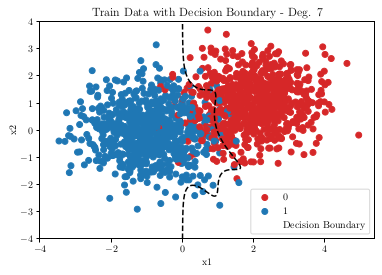

In [95]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_train = pd.read_csv("../hw2_train.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Train Data with Decision Boundary - Deg. 7")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -4:4:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 7) + result[2] * (x ** 6) * y + result[3] * (x ** 5) * (y ** 2) + result[4] * ((x ** 4) * (y ** 3)) + result[5] * ((x ** 3) * (y ** 4)) + result[6] * ((x ** 2) * (y ** 5)) + result[7] * (x * (y ** 6)) + result[8] * (y ** 7), [-result[0]], colors='black')

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg7-train.pgf')

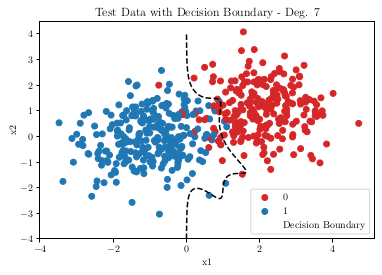

In [96]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_train = pd.read_csv("../hw2_test.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Test Data with Decision Boundary - Deg. 7")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -4:4:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 7) + result[2] * (x ** 6) * y + result[3] * (x ** 5) * (y ** 2) + result[4] * ((x ** 4) * (y ** 3)) + result[5] * ((x ** 3) * (y ** 4)) + result[6] * ((x ** 2) * (y ** 5)) + result[7] * (x * (y ** 6)) + result[8] * (y ** 7), [-result[0]], colors=['k'])


cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg7-test.pgf')